In [1]:
from goes2go import GOES
from goes2go.data import goes_nearesttime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [2]:
time_sat = "2023-02-04T09:30:00.000000000" 
g = goes_nearesttime(time_sat, satellite=16, product="ABI", domain = "F")

 👮🏻‍♂️ File already exists. Do not overwrite: /home/m/m300609/data/noaa-goes16/ABI-L2-MCMIPF/2023/035/09/OR_ABI-L2-MCMIPF-M6_G16_s20230350930211_e20230350939530_c20230350940027.nc
📦 Finished downloading [1] files to [/home/m/m300609/data/noaa-goes16/ABI-L2-MCMIPF].
📚 Finished reading [1] files into xarray.Dataset.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [3]:
dpi = 300
rgb_products = [i for i in dir(g.rgb) if i[0].isupper()]
rgb_products

['AirMass',
 'AirMassTropical',
 'AirMassTropicalPac',
 'Ash',
 'DayCloudConvection',
 'DayCloudPhase',
 'DayConvection',
 'DayLandCloud',
 'DayLandCloudFire',
 'DaySnowFog',
 'DifferentialWaterVapor',
 'Dust',
 'FireTemperature',
 'NaturalColor',
 'NightFogDifference',
 'NighttimeMicrophysics',
 'NormalizedBurnRatio',
 'RocketPlume',
 'SeaSpray',
 'SplitWindowDifference',
 'SulfurDioxide',
 'TrueColor',
 'WaterVapor']

Text(0.5, 1.0, '')

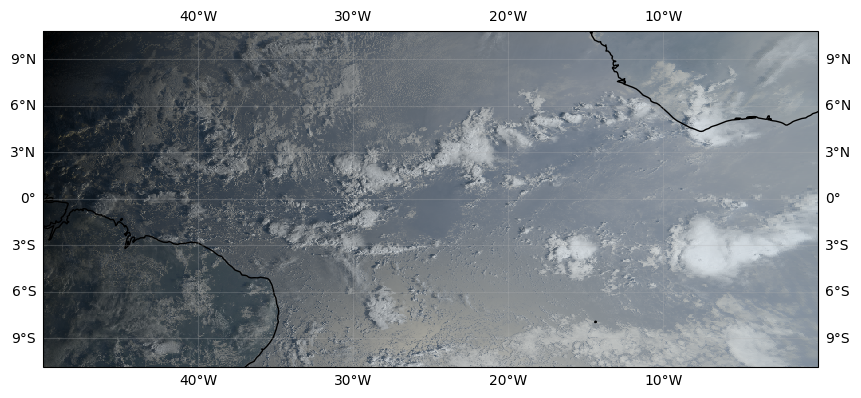

In [6]:
projection = ccrs.PlateCarree()

plt.figure(figsize=(10, 5))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

goes_kwargs = g.rgb.imshow_kwargs

ax.imshow(g.rgb.NaturalColor(gamma=1.2), transform = g.rgb.crs, regrid_shape=3500, interpolation='nearest') # 
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, alpha = 0.25)
ax.set_extent([-50, 0, -10, 10])

plt.title("")